# Project 5 Intrusion Detection

## Import Libraries

In [231]:
pip install datacompy

Note: you may need to restart the kernel to use updated packages.


In [232]:
pip install pydotplus

     |████████████████████████████████| 278 kB 1.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=0045a2578be81ec01aa974ca861a465ea009cbf9d23cf4db65d143fdb5b3565f
  Stored in directory: /home/bonk/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [236]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [241]:
#import libraries
import pandas as pd
import numpy as np
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image


from sklearn.metrics import confusion_matrix

from sklearn.metrics import (log_loss,
                            accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score)

import datacompy

plt.rcParams['figure.facecolor'] = 'w'

## Import dataframes

In [3]:
#setting dataframe as df
df1 = pd.read_csv("/home/bonk/Downloads/bank data project/intrusion_detection.csv")
df2 = pd.read_csv("/home/bonk/Downloads/bank data project/intrusion_detection_notonehot.csv")

## Data check

### df1

In [4]:
display(df1.head())
display(df1.tail())

Unnamed: 0  protocol_type = udp  protocol_type = tcp  protocol_type = icmp  \
0           0                  1.0                  0.0                   0.0   
1           1                  1.0                  0.0                   0.0   
2           2                  1.0                  0.0                   0.0   
3           3                  0.0                  1.0                   0.0   
4           4                  0.0                  1.0                   0.0   

   service = private  service = domain_u  service = http  service = smtp  \
0                1.0                 0.0             0.0             0.0   
1                0.0                 1.0             0.0             0.0   
2                1.0                 0.0             0.0             0.0   
3                0.0                 0.0             1.0             0.0   
4                0.0                 0.0             1.0             0.0   

   service = ftp_data  service = ftp  ...  dst_host_same_srv_rate  \
0                 0.0            0.0  ...                    1.00   
1                 0.0            0.0  ...                    0.30   
2                 0.0            0.0  ...                    0.99   
3                 0.0            0.0  ...                    1.00   
4                 0.0            0.0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.01                         0.00   
1                    0.30                         0.30   
2                    0.01                         0.00   
3                    0.00                         0.01   
4                    0.00                         0.33   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  0.00   
3                         0.01                  0.00   
4                         0.07                  0.33   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    id  outlier@{no,yes}  
0  1.0                no  
1  4.0                no  
2  5.0                no  
3  6.0                no  
4  7.0                no  

[5 rows x 82 columns]

Unnamed: 0  protocol_type = udp  protocol_type = tcp  \
48108       48108                  1.0                  0.0   
48109       48109                  0.0                  0.0   
48110       48110                  0.0                  0.0   
48111       48111                  0.0                  0.0   
48112       48112                  0.0                  0.0   

       protocol_type = icmp  service = private  service = domain_u  \
48108                   0.0                0.0                 1.0   
48109                   1.0                0.0                 0.0   
48110                   1.0                0.0                 0.0   
48111                   1.0                0.0                 0.0   
48112                   1.0                0.0                 0.0   

       service = http  service = smtp  service = ftp_data  service = ftp  ...  \
48108             0.0             0.0                 0.0            0.0  ...   
48109             0.0             0.0                 0.0            0.0  ...   
48110             0.0             0.0                 0.0            0.0  ...   
48111             0.0             0.0                 0.0            0.0  ...   
48112             0.0             0.0                 0.0            0.0  ...   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
48108                     1.0                     0.0   
48109                     1.0                     0.0   
48110                     1.0                     0.0   
48111                     1.0                     0.0   
48112                     1.0                     0.0   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
48108                          0.0                          0.0   
48109                          1.0                          0.0   
48110                          1.0                          0.0   
48111                          1.0                          0.0   
48112                          1.0                          0.0   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
48108                   0.0                       0.0                   0.0   
48109                   0.0                       0.0                   0.0   
48110                   0.0                       0.0                   0.0   
48111                   0.0                       0.0                   0.0   
48112                   0.0                       0.0                   0.0   

       dst_host_srv_rerror_rate       id  outlier@{no,yes}  
48108                       0.0  60392.0                no  
48109                       0.0  60443.0                no  
48110                       0.0  60444.0                no  
48111                       0.0  60608.0                no  
48112                       0.0  60762.0                no  

[5 rows x 82 columns]

In [5]:
#checking total column and rows
df1.shape

(48113, 82)

Here we see there are a LOT of columns and rows and might take a bit of work to go through all of them. We need to see if we can simplify or drop any columns to make it easier.There is a total of 82 columns and 48114 rows of data.

In [6]:
#checking for any null/NaN values
df1.isnull().sum().sum()

0

Luckily there aren't any NaN/null values. 

In [7]:
#quick check on column names
df1.columns

Index(['Unnamed: 0', 'protocol_type = udp', 'protocol_type = tcp',
       'protocol_type = icmp', 'service = private', 'service = domain_u',
       'service = http', 'service = smtp', 'service = ftp_data',
       'service = ftp', 'service = eco_i', 'service = other', 'service = auth',
       'service = ecr_i', 'service = IRC', 'service = X11', 'service = finger',
       'service = time', 'service = telnet', 'service = ntp_u',
       'service = tim_i', 'service = remote_job', 'service = link',
       'service = urp_i', 'service = pop_3', 'service = tftp_u',
       'service = imap4', 'service = nnsp', 'service = uucp',
       'service = courier', 'service = login', 'service = icmp',
       'service = domain', 'flag = SF', 'flag = RSTR', 'flag = S1',
       'flag = REJ', 'flag = S3', 'flag = S2', 'flag = RSTOS0', 'flag = RSTO',
       'flag = SH', 'land = 0', 'duration', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compr

In [8]:
#having a see on the different datatypes 
df1.dtypes.value_counts()

float64    80
object      1
int64       1
dtype: int64

### df2

In [9]:
display(df2.head())
display(df2.tail())

Unnamed: 0  duration  src_bytes  dst_bytes  wrong_fragment  urgent  hot  \
0           0       0.0      105.0      146.0             0.0     0.0  0.0   
1           1       0.0       29.0        0.0             0.0     0.0  0.0   
2           2       0.0      105.0      146.0             0.0     0.0  0.0   
3           3       0.0      223.0      185.0             0.0     0.0  0.0   
4           4       0.0      230.0      260.0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromissed  ...  dst_host_serror_rate  \
0                0.0        0.0               0.0  ...                  0.00   
1                0.0        0.0               0.0  ...                  0.00   
2                0.0        0.0               0.0  ...                  0.00   
3                0.0        1.0               0.0  ...                  0.00   
4                0.0        1.0               0.0  ...                  0.33   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    id  outlier@{no,yes}  protocol_type   service  flag  land  
0  1.0                no            udp   private    SF     0  
1  4.0                no            udp  domain_u    SF     0  
2  5.0                no            udp   private    SF     0  
3  6.0                no            tcp      http    SF     0  
4  7.0                no            tcp      http    SF     0  

[5 rows x 44 columns]

Unnamed: 0  duration  src_bytes  dst_bytes  wrong_fragment  urgent  \
48108       48108       0.0       46.0      130.0             0.0     0.0   
48109       48109       0.0       30.0        0.0             0.0     0.0   
48110       48110       0.0       30.0        0.0             0.0     0.0   
48111       48111       0.0       30.0        0.0             0.0     0.0   
48112       48112       0.0       30.0        0.0             0.0     0.0   

       hot  num_failed_logins  logged_in  num_compromissed  ...  \
48108  0.0                0.0        0.0               0.0  ...   
48109  0.0                0.0        0.0               0.0  ...   
48110  0.0                0.0        0.0               0.0  ...   
48111  0.0                0.0        0.0               0.0  ...   
48112  0.0                0.0        0.0               0.0  ...   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
48108                   0.0                       0.0                   0.0   
48109                   0.0                       0.0                   0.0   
48110                   0.0                       0.0                   0.0   
48111                   0.0                       0.0                   0.0   
48112                   0.0                       0.0                   0.0   

       dst_host_srv_rerror_rate       id  outlier@{no,yes}  protocol_type  \
48108                       0.0  60392.0                no            udp   
48109                       0.0  60443.0                no           icmp   
48110                       0.0  60444.0                no           icmp   
48111                       0.0  60608.0                no           icmp   
48112                       0.0  60762.0                no           icmp   

        service  flag  land  
48108  domain_u    SF     0  
48109     ecr_i    SF     0  
48110     ecr_i    SF     0  
48111     ecr_i    SF     0  
48112     ecr_i    SF     0  

[5 rows x 44 columns]

In [10]:
#Check df2 columns and rows
df2.shape

(48113, 44)

Noticed total columns match that of df1

In [11]:
#Check null/nan values of df2
df2.isnull().sum().sum()

0

No null/nan values luckily

In [12]:
df2.columns

Index(['Unnamed: 0', 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromissed',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbounds_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'id', 'outlier@{no,yes}', 'protocol_type',
       'service', 'flag', 'land'],
      dtype='object')

In [13]:
df2.dtypes.value_counts()

float64    38
object      4
int64       2
dtype: int64

Need to compare column names and row values to see if they match

In [14]:
# compares df1 and df2 to see if the values and columns match
compare = datacompy.Compare(df1,
                            df2,
                            on_index=True,  
                            abs_tol=0,   
                            rel_tol=0, 
                            df1_name='Original',     
                            df2_name='NotOneShot'
                           )
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

    DataFrame  Columns   Rows
0    Original       82  48113
1  NotOneShot       44  48113

Column Summary
--------------

Number of columns in common: 40
Number of columns in Original but not in NotOneShot: 42
Number of columns in NotOneShot but not in Original: 4

Row Summary
-----------

Matched on: index
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 48,113
Number of rows in Original but not in NotOneShot: 0
Number of rows in NotOneShot but not in Original: 0

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 48,113

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 40
Total number of values which compare unequal: 0




As the report above shows, all of the rows and columns are in common as well as the values. We will take the notoneshot to analyze as it seems to have more relevent infromation.

In [15]:
# checking the number of unique values of df2
df2.nunique()

unnamed: 0                     48113
duration                         238
src_bytes                       2375
dst_bytes                       9169
wrong_fragment                     3
urgent                             3
hot                               18
num_failed_logins                  3
logged_in                          2
num_compromissed                  18
root_shell                         2
su_attempted                       3
num_root                          15
num_file_creations                12
num_shells                         4
num_access_files                   5
num_outbounds_cmds                 1
is_host_login                      2
is_guest_login                     2
count                            335
srv_count                        341
serror_rate                       21
srv_serror_rate                   29
rerror_rate                        6
srv_rerror_rate                   32
same_srv_rate                     66
diff_srv_rate                     83
s

In [16]:
#quick check on the columns
display(df2['unnamed: 0'])
print()
display(df2['id'])

0            0
1            1
2            2
3            3
4            4
         ...  
48108    48108
48109    48109
48110    48110
48111    48111
48112    48112
Name: unnamed: 0, Length: 48113, dtype: int64

0            1.0
1            4.0
2            5.0
3            6.0
4            7.0
          ...   
48108    60392.0
48109    60443.0
48110    60444.0
48111    60608.0
48112    60762.0
Name: id, Length: 48113, dtype: float64

The above two columns have the same amount of unique values as rows. Columns will be dropped as it does not help.

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48113 entries, 0 to 48112
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   unnamed: 0                   48113 non-null  int64  
 1   duration                     48113 non-null  float64
 2   src_bytes                    48113 non-null  float64
 3   dst_bytes                    48113 non-null  float64
 4   wrong_fragment               48113 non-null  float64
 5   urgent                       48113 non-null  float64
 6   hot                          48113 non-null  float64
 7   num_failed_logins            48113 non-null  float64
 8   logged_in                    48113 non-null  float64
 9   num_compromissed             48113 non-null  float64
 10  root_shell                   48113 non-null  float64
 11  su_attempted                 48113 non-null  float64
 12  num_root                     48113 non-null  float64
 13  num_file_creatio

In [18]:
# dropping columns that are believed to be irrelevant 
df2.drop(['unnamed: 0','id', 'land','num_outbounds_cmds'], axis=1, inplace=True)

In [19]:
cleanup_num = {'outlier@{no,yes}': {'yes': 1, 'no':0}}

In [20]:
df2.replace(cleanup_num, inplace=True)

In [21]:
df2['outlier@{no,yes}']

0        0
1        0
2        0
3        0
4        0
        ..
48108    0
48109    0
48110    0
48111    0
48112    0
Name: outlier@{no,yes}, Length: 48113, dtype: int64

Dropping the two columns that have all unique values that show no pattern and two columns that only have one unique value and replacing the column outlier to values.

In [22]:
df2.describe()

duration     src_bytes     dst_bytes  wrong_fragment        urgent  \
count  48113.000000  4.811300e+04  4.811300e+04    48113.000000  48113.000000   
mean      13.660424  9.219320e+02  4.495927e+03        0.004074      0.000083   
std      603.966956  3.845373e+04  4.064759e+04        0.098332      0.014417   
min        0.000000  0.000000e+00  0.000000e+00        0.000000      0.000000   
25%        0.000000  2.110000e+02  3.320000e+02        0.000000      0.000000   
50%        0.000000  2.500000e+02  1.148000e+03        0.000000      0.000000   
75%        0.000000  3.120000e+02  3.410000e+03        0.000000      0.000000   
max    54451.000000  6.291668e+06  5.203179e+06        3.000000      3.000000   

                hot  num_failed_logins     logged_in  num_compromissed  \
count  48113.000000       48113.000000  48113.000000      48113.000000   
mean       0.025793           0.000291      0.882818          0.045206   
std        0.702077           0.025788      0.321641          4.916020   
min        0.000000           0.000000      0.000000          0.000000   
25%        0.000000           0.000000      1.000000          0.000000   
50%        0.000000           0.000000      1.000000          0.000000   
75%        0.000000           0.000000      1.000000          0.000000   
max      101.000000           3.000000      1.000000        796.000000   

         root_shell  ...  dst_host_srv_count  dst_host_same_srv_rate  \
count  48113.000000  ...        48113.000000            48113.000000   
mean       0.000935  ...          226.149440                0.933777   
std        0.030569  ...           65.754955                0.198722   
min        0.000000  ...            0.000000                0.000000   
25%        0.000000  ...          251.000000                1.000000   
50%        0.000000  ...          255.000000                1.000000   
75%        0.000000  ...          255.000000                1.000000   
max        1.000000  ...          255.000000                1.000000   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
count            48113.000000                 48113.000000   
mean                 0.013689                     0.080444   
std                  0.075218                     0.203149   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  0.000000                     0.010000   
75%                  0.000000                     0.040000   
max                  1.000000                     1.000000   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
count                 48113.000000          48113.000000   
mean                      0.019695              0.003301   
std                       0.035692              0.048284   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.010000              0.000000   
75%                       0.030000              0.000000   
max                       1.000000              1.000000   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
count              48113.000000          48113.000000   
mean                   0.002434              0.004722   
std                    0.044497              0.052027   
min                    0.000000              0.000000   
25%                    0.000000              0.000000   
50%                    0.000000              0.000000   
75%                    0.000000              0.000000   
max                    1.000000              1.000000   

       dst_host_srv_rerror_rate  outlier@{no,yes}  
count              48113.000000      48113.000000  
mean                   0.002530          0.004157  
std                    0.042909          0.064340  
min                    0.000000          0.000000  
25%                    0.000000          0.000000  
50%                    0.000000        

Because of a large amount of columns, not much can be taken from this.

In [23]:
# printing out column and unique values that go with them
for column in df2.columns:
    print(df2[column].value_counts())
    print()

0.0       46236
1.0         883
2.0         132
3.0         127
4.0          57
          ...  
93.0          1
164.0         1
684.0         1
89.0          1
2417.0        1
Name: duration, Length: 238, dtype: int64

44.0       595
0.0        571
42.0       491
45.0       488
221.0      460
          ... 
11821.0      1
1349.0       1
2179.0       1
5399.0       1
748.0        1
Name: src_bytes, Length: 2375, dtype: int64

0.0        2134
42.0        451
330.0       322
331.0       270
332.0       262
           ... 
2710.0        1
2450.0        1
19399.0       1
6430.0        1
5338.0        1
Name: dst_bytes, Length: 9169, dtype: int64

0.0    48007
1.0       61
3.0       45
Name: wrong_fragment, dtype: int64

0.0    48111
3.0        1
1.0        1
Name: urgent, dtype: int64

0.0      47908
4.0         53
1.0         45
5.0         24
2.0         20
6.0         13
7.0         12
3.0          9
18.0         7
19.0         6
22.0         4
24.0         3
14.0         2
30.0         

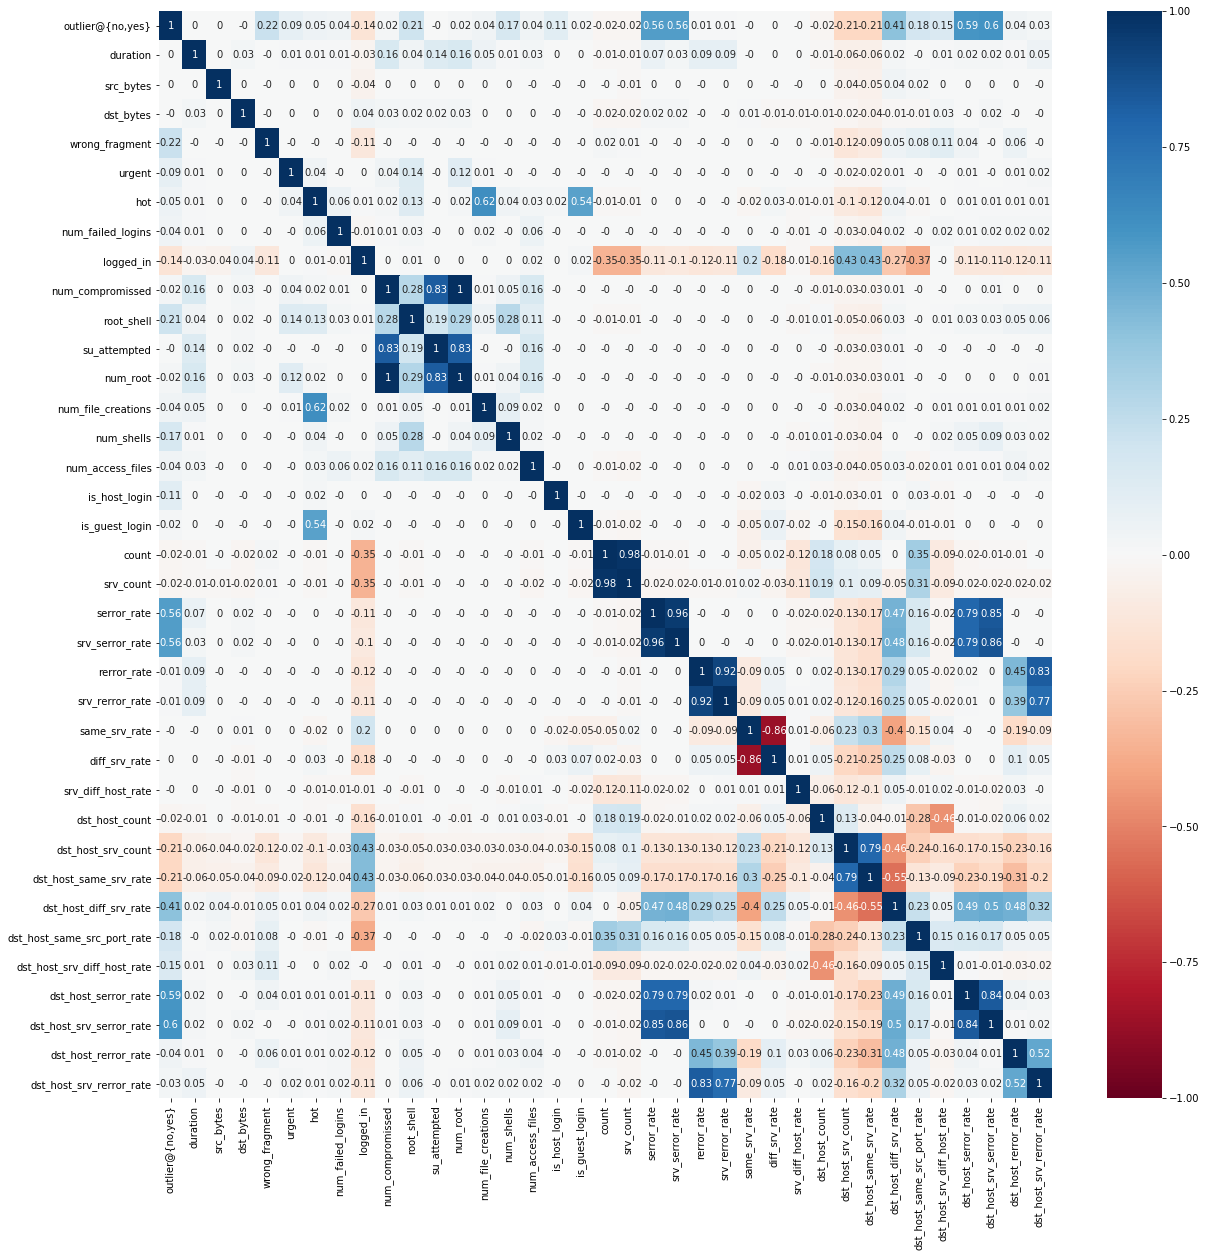

In [24]:
plt.figure(figsize = (20,20))
df3=df2.copy()
first_col=df3.pop('outlier@{no,yes}')
df3.head()
df3.insert(0,'outlier@{no,yes}',first_col)
df3.head()
sns.heatmap(df3.corr().round(2),
           cmap="RdBu",
           vmin=-1,
           vmax=1,
           annot=True)
plt.show()

The heatmap shows provides an idea on some of the columns that correlate to the target column. Here we see  9 columns: 'wrong_fragment', 'root_shell', 'serror_rate', 'srv_serror_rate','dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate','dst_host_srv_serror_rate' being higher than a threshold of 0.2. Maybe those are the columns to take and check for in the model.

## Model 1 Base

In [25]:
categorical_variables = [
    'protocol_type',
    'service',
    'flag'
]

In [26]:
#dummy out categorical variables
df_dummy = df2.join(pd.get_dummies(df2[categorical_variables]))

In [27]:
#Set data
X1 = df_dummy.drop(['outlier@{no,yes}','protocol_type','service','flag'], axis=1)
y1 = df2['outlier@{no,yes}']

X1_train, X1_val, y1_train, y1_val = train_test_split(X1,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model1 = LogisticRegression(class_weight = 'balanced',
                            max_iter=100000)

#fit the model
model1.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     38342
           1       0.08      0.99      0.16       148

    accuracy                           0.96     38490
   macro avg       0.54      0.97      0.57     38490
weighted avg       1.00      0.96      0.98     38490


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9571
           1       0.12      0.96      0.21        52

    accuracy                           0.96      9623
   macro avg       0.56      0.96      0.59      9623
weighted avg       1.00      0.96      0.98      9623




array([[ 1.00113031e-05,  5.01817888e-06, -7.96745158e-07,
         2.13137483e+00,  5.49770392e-02,  8.96635788e-01,
         9.41362627e-03, -1.10582369e+00, -9.50223929e-02,
         4.03450556e-01, -3.54147970e-03,  2.35479678e-01,
         4.03801924e-01,  1.15340339e-01,  3.24609091e-01,
         4.49334878e-02,  6.96726629e-03, -6.48417736e-02,
        -3.51156817e-03,  5.91284610e-01,  5.90905580e-01,
        -5.44648873e-03, -1.98217177e-03,  4.90262666e-01,
        -8.78585567e-02,  1.97260328e-01,  9.35892033e-03,
        -2.08079310e-02, -2.30229701e-03,  6.07895349e-01,
         1.53119151e+00,  3.06036413e-01,  7.30694595e-01,
         6.01869373e-01, -1.30617152e-02,  2.83203221e-02,
         1.28292654e+00, -8.70657575e-01,  4.23420344e-04,
        -6.73038697e-03, -1.08064515e-03, -6.44295752e-02,
         7.26728509e-03,  0.00000000e+00, -3.31131174e-01,
        -2.98589989e-02,  1.22270186e+00, -1.28234187e-01,
         1.17091457e-01, -1.55294956e-01, -6.95782329e-0

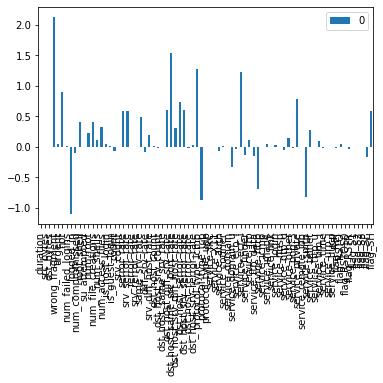

In [129]:
print(classification_report(y1_train,model1.predict(X1_train)))
print()
print(classification_report(y1_val,model1.predict(X1_val)))
print()
display(model1.coef_)
print()
pd.DataFrame(model1.coef_, columns=X1.columns).transpose().plot.bar() 

From the preliminary assessment, the accuracy might be high but the f1 score and precision is quite low. Lets see if we can improve it by filtering specific columns to analyze. We will take the mean and choose the ones above the mean.

In [29]:
# Puts coefficients into a dataframe and take only the columns above the mean coef
coef1_df= pd.DataFrame(model1.coef_, columns=X1.columns).transpose()

coef1_df.loc[coef1_df[0]>coef1_df.mean().values[0],:].index.tolist()

['wrong_fragment',
 'hot',
 'root_shell',
 'num_root',
 'num_file_creations',
 'num_access_files',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'protocol_type_icmp',
 'service_ecr_i',
 'service_other',
 'service_private',
 'service_telnet',
 'flag_SH']

## Model 1b

In [30]:
#uses columns created from previous model
X1b = X1[coef1_df.loc[coef1_df[0]>coef1_df.mean().values[0],:].index.tolist()]
#still using y1

In [31]:
X1b_train, X1b_val, y1b_train, y1b_val = train_test_split(X1b,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model1b = LogisticRegression(class_weight = 'balanced',
                            max_iter=1000)

#fit the model
model1b.fit(X1b_train,y1b_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     38342
           1       0.24      0.95      0.39       148

    accuracy                           0.99     38490
   macro avg       0.62      0.97      0.69     38490
weighted avg       1.00      0.99      0.99     38490


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9571
           1       0.31      0.92      0.46        52

    accuracy                           0.99      9623
   macro avg       0.65      0.96      0.73      9623
weighted avg       1.00      0.99      0.99      9623




array([[ 5.82602329,  1.02064369,  2.62950356, -0.03362339,  0.57744451,
         0.68896683, -1.70014593, -1.50054366,  1.08034832, -0.92253687,
         1.65143054,  2.12445848,  4.61821526, 14.00035337, -2.8727461 ,
         4.98629413, -4.96416975,  5.12796585, -1.26137391,  4.5085296 ,
         1.23335895]])

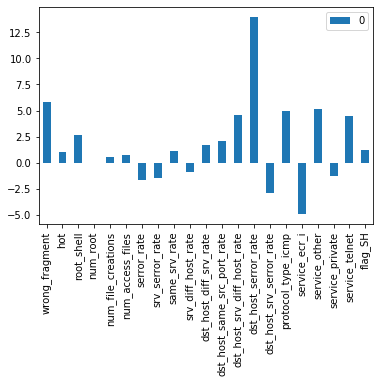

In [130]:
print(classification_report(y1b_train,model1b.predict(X1b_train)))
print()
print(classification_report(y1b_val,model1b.predict(X1b_val)))
print()
display(model1b.coef_)
print()
pd.DataFrame(model1b.coef_, columns=X1b.columns).transpose().plot.bar() 

Here we have an improved model with double the score in f1 and precision. Lets try simplifying once more to see if it will make it better

In [33]:
coef1b_df= pd.DataFrame(model1b.coef_, columns=X1b.columns).transpose()

coef1b_df.loc[coef1b_df[0]>coef1b_df.mean().values[0],:].index.tolist()

['wrong_fragment',
 'root_shell',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'protocol_type_icmp',
 'service_other',
 'service_telnet']

## Model 1c

In [34]:
#uses columns created from previous model
X1c = X1[coef1b_df.loc[coef1b_df[0]>coef1b_df.mean().values[0],:].index.tolist()]
#still using y1

In [35]:
X1c_train, X1c_val, y1c_train, y1c_val = train_test_split(X1c,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model1c = LogisticRegression(class_weight = 'balanced',
                            max_iter=1000)

#fit the model
model1c.fit(X1c_train,y1c_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     38342
           1       0.24      0.93      0.38       148

    accuracy                           0.99     38490
   macro avg       0.62      0.96      0.69     38490
weighted avg       1.00      0.99      0.99     38490


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9571
           1       0.31      0.90      0.46        52

    accuracy                           0.99      9623
   macro avg       0.65      0.95      0.73      9623
weighted avg       1.00      0.99      0.99      9623




array([[ 4.19873658,  4.85800364,  2.21272813,  3.21112916, 13.46800688,
         4.00968874,  5.06310663,  5.50586217]])

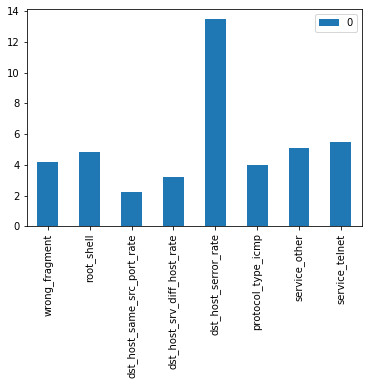

In [131]:
print(classification_report(y1c_train,model1c.predict(X1c_train)))
print()
print(classification_report(y1c_val,model1c.predict(X1c_val)))
print()
display(model1c.coef_)
print()
pd.DataFrame(model1c.coef_, columns=X1c.columns).transpose().plot.bar() 

It seems like the limit has been reached. Model 2 and model 3 seems to give similar f1 and precision score as each other. Model 3 gives all positive correlation and model 2 has both positive and negative correlations. 

## Additional Feature Engineering

In [37]:
for column in df2.columns:
    print(df2[column].value_counts())
    print()

0.0       46236
1.0         883
2.0         132
3.0         127
4.0          57
          ...  
93.0          1
164.0         1
684.0         1
89.0          1
2417.0        1
Name: duration, Length: 238, dtype: int64

44.0       595
0.0        571
42.0       491
45.0       488
221.0      460
          ... 
11821.0      1
1349.0       1
2179.0       1
5399.0       1
748.0        1
Name: src_bytes, Length: 2375, dtype: int64

0.0        2134
42.0        451
330.0       322
331.0       270
332.0       262
           ... 
2710.0        1
2450.0        1
19399.0       1
6430.0        1
5338.0        1
Name: dst_bytes, Length: 9169, dtype: int64

0.0    48007
1.0       61
3.0       45
Name: wrong_fragment, dtype: int64

0.0    48111
3.0        1
1.0        1
Name: urgent, dtype: int64

0.0      47908
4.0         53
1.0         45
5.0         24
2.0         20
6.0         13
7.0         12
3.0          9
18.0         7
19.0         6
22.0         4
24.0         3
14.0         2
30.0         

Given the values and value counts, simplifying some of the columns to be 1 and 0 might improve the model. Columns such as urgent has 3 distinct values of 0, 1 and 3. We can replace it with just 0 and 1 meaning if it is urgent or not. Other columns are as follows:

In [38]:
#converts to true and false (1,0)
df2['is_urgent']=df2['urgent'].astype('bool').astype('int')
df2['is_wrong_fragment']=df2['wrong_fragment'].astype('bool').astype('int')
df2['is_num_failed_logins']=df2['num_failed_logins'].astype('bool').astype('int')
df2['is_su_attempted']=df2['su_attempted'].astype('bool').astype('int')
df2['is_compromissed']=df2['num_compromissed'].astype('bool').astype('int')
df2['is_num_shells']=df2['num_shells'].astype('bool').astype('int')


In [39]:
bool_conversion = ['urgent', 'wrong_fragment','num_failed_logins','su_attempted','num_compromissed','num_shells']

In [40]:
df2.drop(bool_conversion,axis=1,inplace=True)

Additional to reorganizing the booleans, we recatagorized the columns with many different unique values into groupings.

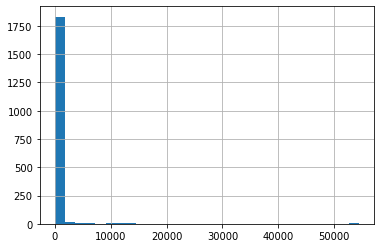

In [41]:
df2.loc[df2['duration']>0, 'duration'].hist(bins=30)

Seeing the histogram, we split the duration by either a yes or no.

In [42]:
#Minimizing unique values in duration column
def duration_to_range(x):
    if x==0:
        return 0
    else:
        return 1

In [43]:
#adds duration to range column into df2
df2['duration_to_range']=df2['duration'].apply(duration_to_range)
#Check for unique number
df2['duration_to_range'].nunique()

2

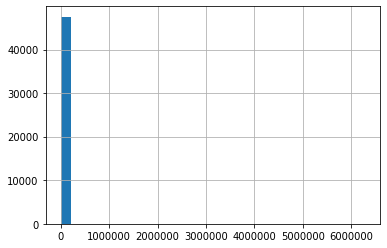

In [44]:
df2.loc[df2['src_bytes']>0, 'src_bytes'].hist(bins=30)

Similar to the one above, we split them into yes and no

In [45]:
#Minimizing unique values in src_bytes column
def src_bytes_to_range(x):
    if x==0:
        return 0
    else:
        return 1

In [46]:
df2['src_bytes_to_range']=df2['src_bytes'].apply(src_bytes_to_range)
df2['src_bytes_to_range'].nunique()

2

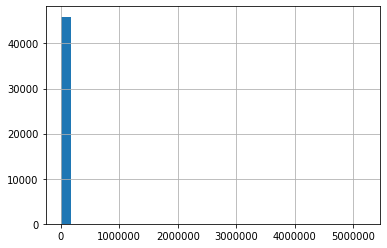

In [47]:
df2.loc[df2['dst_bytes']>0, 'dst_bytes'].hist(bins=30)

In [48]:
#Minimizing unique values in dst_bytes column
def dst_bytes_to_range(x):
    if x==0:
        return 0
    else:
        return 1

In [49]:
df2['dst_bytes_to_range']=df2['dst_bytes'].apply(dst_bytes_to_range)
df2['dst_bytes_to_range'].nunique()

2

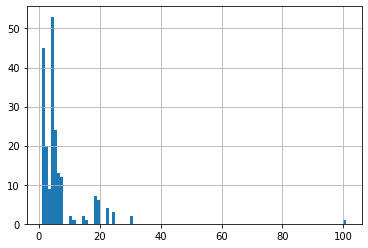

In [50]:
df2.loc[df2['hot']>0, 'hot'].hist(bins=100)

In [51]:
#Minimizing unique values in 'hot' column
def hot_to_range(x):
    if x==0:
        return 0
    elif x>=1 and x<=3:
        return 1
    elif x>=4 and x<=6:
        return 2
    else:
        return 3

In [52]:
df2['hot_range']=df2['hot'].apply(hot_to_range)
df2['hot_range'].nunique()

4

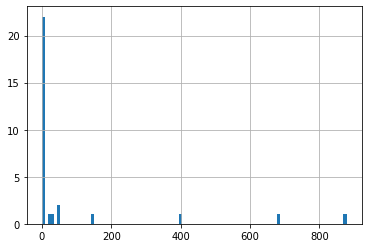

In [53]:
df2.loc[df2['num_root']>0, 'num_root'].hist(bins=100)

In [54]:
#Minimizing unique values in 'num_root' column
def num_root_to_range(x):
    if x==0:
        return 0
    elif x>=1 and x<=5:
        return 1
    else:
        return 2

In [55]:
df2['num_root_to_range']=df2['num_root'].apply(num_root_to_range)
df2['num_root_to_range'].nunique()

3

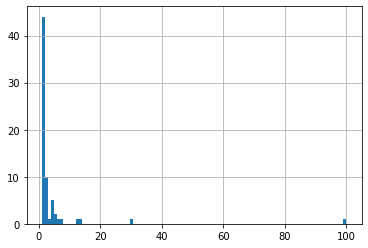

In [56]:
df2.loc[df2['num_file_creations']>0, 'num_file_creations'].hist(bins=100)

In [57]:
#Minimixing unique values in num_file_creations column

def num_files_creation_to_range(x):
    if x==0:
        return 0
    elif x==1 and x<=4:
        return 1
    else:
        return 2

In [58]:
df2['num_files_creation_to_range']=df2['num_file_creations'].apply(num_files_creation_to_range)
df2['num_files_creation_to_range'].nunique()

3

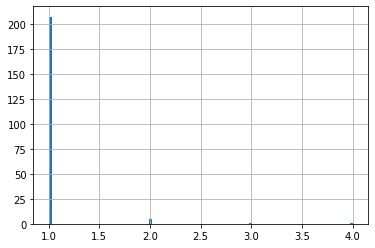

In [59]:
df2.loc[df2['num_access_files']>0, 'num_access_files'].hist(bins=100)

In [60]:
#Minimixing unique values in num_access_files column

def num_access_files_to_range(x):
    if x==0:
        return 0
    elif x==1:
        return 1
    else:
        return 2

In [61]:
df2['num_access_files_to_range']=df2['num_access_files'].apply(num_access_files_to_range)
df2['num_access_files_to_range'].nunique()

3

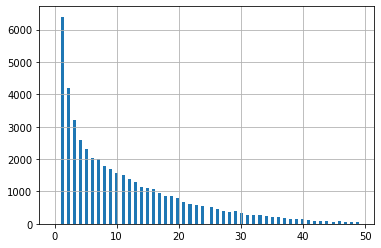

In [62]:
df2.loc[df2['srv_count']<50, 'srv_count'].hist(bins=100)

In [63]:
#Minimixing unique values in srv_count column

def srv_count_to_range(x):
    if x==0:
        return 0
    elif x>=1 and x<=3:
        return 1
    elif x>=4 and x<=10:
        return 2
    elif x>=11 and x<=20:
        return 3
    elif x>=21 and x<=40:
        return 4
    else:
        return 5

In [64]:
df2['srv_count_to_range']=df2['srv_count'].apply(srv_count_to_range)
df2['srv_count_to_range'].nunique()

6

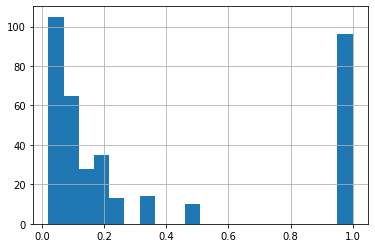

In [65]:
df2.loc[df2['serror_rate']>0, 'serror_rate'].hist(bins=20)

In [66]:
#Minimixing unique values in serror_rate column
def serror_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.1:
        return 1
    elif x>0.1 and x<=0.2:
        return 2
    elif x>0.2 and x<0.6:
        return 3
    else:
        return 4

In [67]:
df2['serror_rate_to_range']=df2['serror_rate'].apply(serror_rate_to_range)
df2['serror_rate_to_range'].nunique()

5

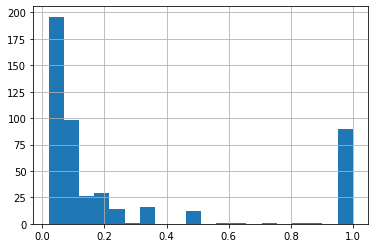

In [68]:
df2.loc[df2['srv_serror_rate']>0, 'srv_serror_rate'].hist(bins=20)

In [69]:
#Minimixing unique values in srv_serror_rate column
def srv_serror_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.1:
        return 1
    elif x>0.1 and x<=0.2:
        return 2
    elif x>0.2 and x<0.6:
        return 3
    else:
        return 4

In [70]:
df2['srv_serror_rate_to_range']=df2['srv_serror_rate'].apply(srv_serror_rate_to_range)
df2['srv_serror_rate_to_range'].nunique()

5

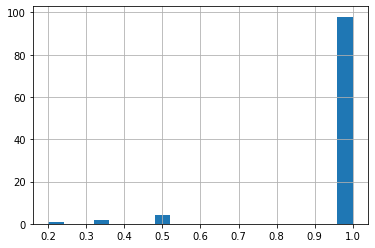

In [71]:
df2.loc[df2['rerror_rate']>0, 'rerror_rate'].hist(bins=20)

In [72]:
#Minimixing unique values in rerror_rate column
def rerror_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.9:
        return 1
    else:
        return 2

In [73]:
df2['rerror_rate_to_range']=df2['rerror_rate'].apply(rerror_rate_to_range)
df2['rerror_rate_to_range'].nunique()

3

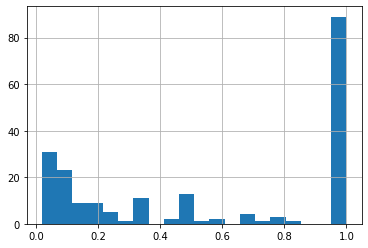

In [74]:
df2.loc[df2['srv_rerror_rate']>0, 'srv_rerror_rate'].hist(bins=20)

In [75]:
#Minimixing unique values in srv_rerror_rate column
def srv_rerror_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.5:
        return 1
    elif x>0.5 and x<=0.9:
        return 2
    else:
        return 3

In [76]:
df2['srv_rerror_rate_to_range']=df2['srv_rerror_rate'].apply(srv_rerror_rate_to_range)
df2['srv_rerror_rate_to_range'].nunique()

4

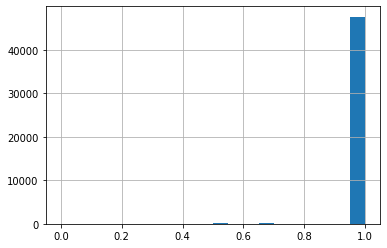

In [77]:
df2.loc[df2['same_srv_rate']>=0, 'same_srv_rate'].hist(bins=20)

In [78]:
#Minimixing unique values in same_srv_rate column
def same_srv_rate_to_range(x):
    if x==1:
        return 1
    else:
        return 0

In [79]:
df2['same_srv_rate_to_range']=df2['same_srv_rate'].apply(same_srv_rate_to_range)
df2['same_srv_rate_to_range'].nunique()

2

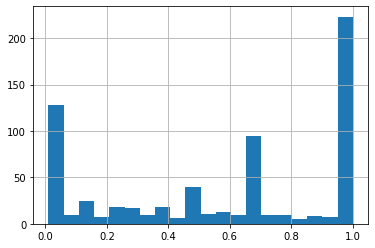

In [80]:
df2.loc[df2['diff_srv_rate']>0, 'diff_srv_rate'].hist(bins=20)

In [81]:
#Minimixing unique values in diff_srv_rate column
def diff_srv_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.4:
        return 1
    elif x>0.4 and x<=0.8:
        return 2
    else:
        return 3

In [82]:
df2['diff_srv_rate_to_range']=df2['diff_srv_rate'].apply(diff_srv_rate_to_range)
df2['diff_srv_rate_to_range'].nunique()

4

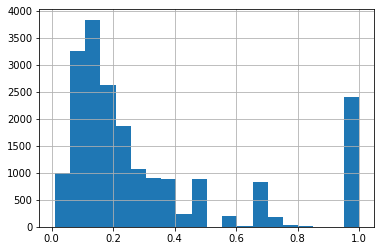

In [83]:
df2.loc[df2['srv_diff_host_rate']>0, 'srv_diff_host_rate'].hist(bins=20)

In [84]:
#Minimixing unique values in srv_diff_host_rate column
def srv_diff_host_rate_to_range(x):
    if x==0:
        return 0
    elif x>0 and x<=0.2:
        return 1
    elif x>0.2 and x<=0.4:
        return 2
    elif x>0.4 and x<=0.6:
        return 3
    else:
        return 4

In [85]:
df2['srv_diff_host_rate_to_range']=df2['srv_diff_host_rate'].apply(srv_diff_host_rate_to_range)
df2['srv_diff_host_rate_to_range'].nunique()

5

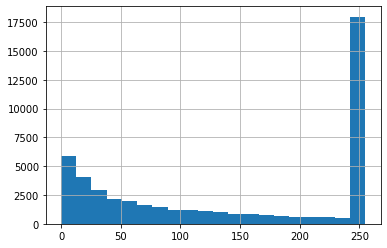

In [86]:
df2.loc[df2['dst_host_count']>=0, 'dst_host_count'].hist(bins=20)

In [87]:
#Minimixing unique values in dst_host_count column
def dst_host_count_to_range(x):
    if x<=50:
        return 0
    elif x>50 and x<=150:
        return 1
    elif x>150 and x<250:
        return 2
    else:
        return 3

In [88]:
df2['dst_host_count_to_range']=df2['dst_host_count'].apply(dst_host_count_to_range)
df2['dst_host_count_to_range'].nunique()

4

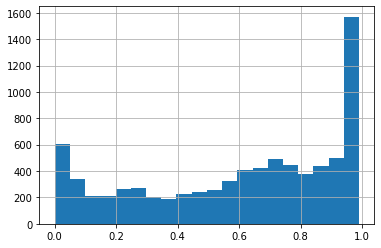

In [89]:
df2.loc[df2['dst_host_same_srv_rate']<1, 'dst_host_same_srv_rate'].hist(bins=20)

In [90]:
#Minimixing unique values in dst_host_same_srv_rate column
def dst_host_same_srv_rate_to_range(x):
    if x<=0.3:
        return 0
    elif x>0.3 and x<=0.6:
        return 1
    elif x>0.6 and x<=0.9:
        return 2
    else:
        return 3

In [91]:
df2['dst_host_same_srv_rate_to_range']=df2['dst_host_same_srv_rate'].apply(dst_host_same_srv_rate_to_range)
df2['dst_host_same_srv_rate_to_range'].nunique()

4

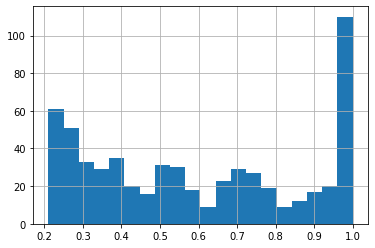

In [92]:
df2.loc[df2['dst_host_diff_srv_rate']>0.2, 'dst_host_diff_srv_rate'].hist(bins=20)

In [93]:
#Minimixing unique values in dst_host_diff_srv_rate column
def dst_host_diff_srv_rate_to_range(x):
    if x<=0.1:
        return 0
    elif x>0.1 and x<=0.5:
        return 1
    elif x>0.5 and x<=0.9:
        return 2
    else:
        return 3

In [94]:
df2['dst_host_diff_srv_rate_to_range']=df2['dst_host_diff_srv_rate'].apply(dst_host_diff_srv_rate_to_range)
df2['dst_host_diff_srv_rate_to_range'].nunique()

4

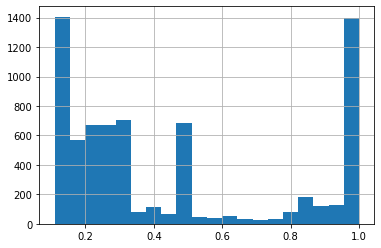

In [95]:
df2.loc[df2['dst_host_same_src_port_rate']>0.1, 'dst_host_same_src_port_rate'].hist(bins=20)

In [96]:
#Minimixing unique values in dst_host_same_src_port_rate column
def dst_host_same_src_port_rate_to_range(x):
    if x<=0.1:
        return 0
    elif x>0.1 and x<=0.4:
        return 1
    elif x>0.4 and x<=0.9:
        return 2
    else:
        return 3

In [97]:
df2['dst_host_same_src_port_rate_to_range']=df2['dst_host_same_src_port_rate'].apply(dst_host_same_src_port_rate_to_range)
df2['dst_host_same_src_port_rate_to_range'].nunique()

4

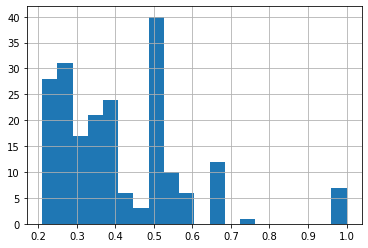

In [98]:
df2.loc[df2['dst_host_srv_diff_host_rate']>0.2, 'dst_host_srv_diff_host_rate'].hist(bins=20)

In [99]:
#Minimixing unique values in dst_host_srv_diff_host_rate column
def dst_host_srv_diff_host_rate_to_range(x):
    if x<=0.1:
        return 0
    elif x>0.1 and x<=0.3:
        return 1
    elif x>0.3 and x<=0.6:
        return 2
    else:
        return 3

In [100]:
df2['dst_host_srv_diff_host_rate_to_range']=df2['dst_host_srv_diff_host_rate'].apply(dst_host_srv_diff_host_rate_to_range)
df2['dst_host_srv_diff_host_rate_to_range'].nunique()

4

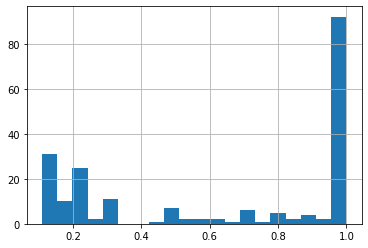

In [101]:
df2.loc[df2['dst_host_serror_rate']>0.1, 'dst_host_serror_rate'].hist(bins=20)

In [102]:
#Minimixing unique values in dst_host_serror_rate column
def dst_host_serror_rate_to_range(x):
    if x<0.1:
        return 0
    elif x>0.1 and x<=0.3:
        return 1
    elif x>0.3 and x<=0.9:
        return 2
    else:
        return 3

In [103]:
df2['dst_host_serror_rate_to_range']=df2['dst_host_serror_rate'].apply(dst_host_serror_rate_to_range)
df2['dst_host_serror_rate_to_range'].nunique()

4

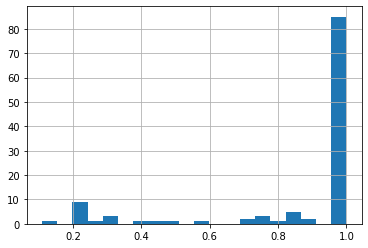

In [104]:
df2.loc[df2['dst_host_srv_serror_rate']>0.1, 'dst_host_srv_serror_rate'].hist(bins=20)

In [105]:
#Minimixing unique values in dst_host_srv_serror_rate column
def dst_host_srv_serror_rate_to_range(x):
    if x<0.1:
        return 0
    elif x>0.1 and x<=0.9:
        return 1
    else:
        return 2

In [106]:
df2['dst_host_srv_serror_rate_to_range']=df2['dst_host_srv_serror_rate'].apply(dst_host_srv_serror_rate_to_range)
df2['dst_host_srv_serror_rate_to_range'].nunique()

3

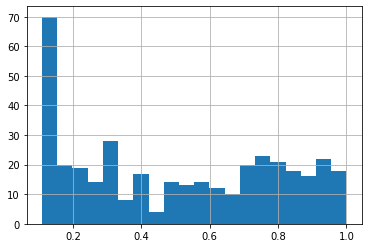

In [107]:
df2.loc[df2['dst_host_rerror_rate']>0.1, 'dst_host_rerror_rate'].hist(bins=20)

In [108]:
#Minimixing unique values in dst_host_rerror_rate column
def dst_host_rerror_rate_to_range(x):
    if x<0.1:
        return 0
    elif x>0.1 and x<=0.3:
        return 1
    elif x>0.3 and x<=0.6:
        return 2
    else:
        return 3

In [109]:
df2['dst_host_rerror_rate_to_range']=df2['dst_host_rerror_rate'].apply(dst_host_rerror_rate_to_range)
df2['dst_host_rerror_rate_to_range'].nunique()

4

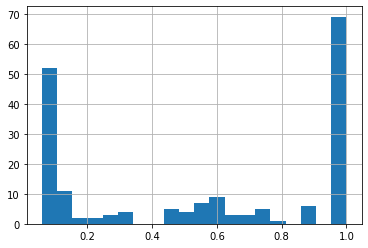

In [110]:
df2.loc[df2['dst_host_srv_rerror_rate']>0.05, 'dst_host_srv_rerror_rate'].hist(bins=20)

In [111]:
#Minimixing unique values in dst_host_srv_rerror_rate column
def dst_host_srv_rerror_rate_to_range(x):
    if x<0.1:
        return 0
    elif x>0.1 and x<=0.9:
        return 1
    else:
        return 2

In [112]:
df2['dst_host_srv_rerror_rate_to_range']=df2['dst_host_srv_rerror_rate'].apply(dst_host_srv_rerror_rate_to_range)
df2['dst_host_srv_rerror_rate_to_range'].nunique()

3

In [113]:
#Columns that are transformed stored
PRETRANSFORMED_COLS = ['dst_bytes','src_bytes','duration', 'hot', 'num_root','num_file_creations',
                       'num_access_files', 'srv_count','serror_rate','srv_serror_rate',
                       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                       'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate',
                       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                       'dst_host_srv_rerror_rate'
                      ]

## Model 2

In [114]:
#Set data
X2 = df2.drop(['outlier@{no,yes}','protocol_type','service','flag']+PRETRANSFORMED_COLS, axis=1)
#y1 is the same

X2_train, X2_val, y2_train, y2_val = train_test_split(X2,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model2 = LogisticRegression(class_weight = 'balanced',
                            max_iter=100000)

#fit the model
model2.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     38342
           1       0.18      0.99      0.30       148

    accuracy                           0.98     38490
   macro avg       0.59      0.99      0.64     38490
weighted avg       1.00      0.98      0.99     38490


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9571
           1       0.25      0.94      0.39        52

    accuracy                           0.98      9623
   macro avg       0.62      0.96      0.69      9623
weighted avg       1.00      0.98      0.99      9623




array([[-2.9612222 ,  7.0333341 ,  1.58087257, -1.57756061, -0.03852623,
        -0.04165278,  0.27398551, 12.16708977,  1.10980135, -0.83000696,
        -0.10212357,  0.76590335,  4.02901748, -3.80555161, -2.2766034 ,
         1.23501298, -0.66924554,  3.95411549,  3.85991629, -0.65957459,
        -0.6327876 , -0.09133622, -1.55533613, -0.45359636, -2.55824129,
        -1.09192932, -0.51179771,  0.68890099,  1.1667619 ,  0.23429232,
        -0.55439636, -1.09733635,  2.1629768 ,  0.1213399 , -2.45927116,
         1.32399776]])

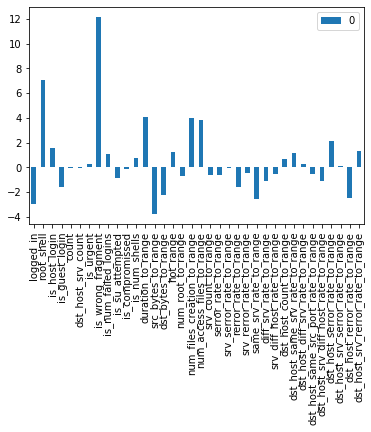

In [128]:
print(classification_report(y2_train,model2.predict(X2_train)))
print()
print(classification_report(y2_val,model2.predict(X2_val)))
print()
display(model2.coef_)
print()
pd.DataFrame(model2.coef_, columns=X2.columns).transpose().plot.bar() 

In [116]:
# Puts coefficients into a dataframe and take only the columns above the mean coef
coef2_df= pd.DataFrame(model2.coef_, columns=X2.columns).transpose()

coef2_df.loc[coef2_df[0]>coef2_df.mean().values[0],:].index.tolist()

['root_shell',
 'is_host_login',
 'is_wrong_fragment',
 'is_num_failed_logins',
 'is_num_shells',
 'duration_to_range',
 'hot_range',
 'num_files_creation_to_range',
 'num_access_files_to_range',
 'dst_host_count_to_range',
 'dst_host_same_srv_rate_to_range',
 'dst_host_serror_rate_to_range',
 'dst_host_srv_rerror_rate_to_range']

## Model 2b

In [117]:
#uses columns created from previous model
X2b = X2[coef2_df.loc[coef2_df[0]>coef2_df.mean().values[0],:].index.tolist()]
#still using y1

In [118]:
X2b_train, X2b_val, y2b_train, y2b_val = train_test_split(X2b,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model2b = LogisticRegression(class_weight = 'balanced',
                            max_iter=1000)

#fit the model
model2b.fit(X2b_train,y2b_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     38342
           1       0.08      0.96      0.14       148

    accuracy                           0.95     38490
   macro avg       0.54      0.96      0.56     38490
weighted avg       1.00      0.95      0.97     38490


              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9571
           1       0.10      0.88      0.17        52

    accuracy                           0.95      9623
   macro avg       0.55      0.92      0.57      9623
weighted avg       0.99      0.95      0.97      9623




array([[ 4.12994866,  5.21057225,  7.4099959 , -0.12405678,  0.9977719 ,
         0.06388647,  0.78308521,  1.9478638 ,  0.3151463 , -0.4579613 ,
        -1.45052649,  2.0708697 ,  0.90565389]])

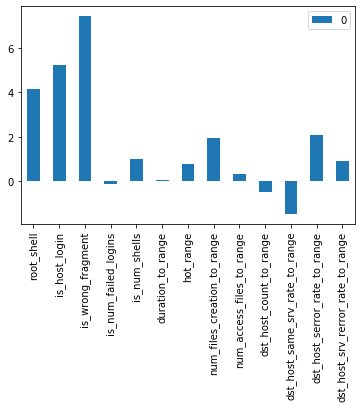

In [127]:
print(classification_report(y2b_train,model2b.predict(X2b_train)))
print()
print(classification_report(y2b_val,model2b.predict(X2b_val)))
print()
display(model2b.coef_)
print()
pd.DataFrame(model2b.coef_, columns=X2b.columns).transpose().plot.bar() 

In [120]:
# Puts coefficients into a dataframe and take only the columns above the mean coef
coef2b_df= pd.DataFrame(model2b.coef_, columns=X2b.columns).transpose()

coef2b_df.loc[coef2b_df[0]>coef2b_df.mean().values[0],:].index.tolist()

['root_shell',
 'is_host_login',
 'is_wrong_fragment',
 'num_files_creation_to_range',
 'dst_host_serror_rate_to_range']

## Model 2c

In [122]:
#uses columns created from previous model
X2c = X2[coef2b_df.loc[coef2b_df[0]>coef2b_df.mean().values[0],:].index.tolist()]
#still using y1

In [123]:
X2c_train, X2c_val, y2c_train, y2c_val = train_test_split(X2c,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

#set the model
model2c = LogisticRegression(class_weight = 'balanced',
                            max_iter=1000)

#fit the model
model2c.fit(X2c_train,y2c_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       0.41      0.86      0.56       148

    accuracy                           0.99     38490
   macro avg       0.71      0.93      0.78     38490
weighted avg       1.00      0.99      1.00     38490


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9571
           1       0.47      0.77      0.58        52

    accuracy                           0.99      9623
   macro avg       0.73      0.88      0.79      9623
weighted avg       1.00      0.99      0.99      9623




array([[5.84152706, 5.10202508, 7.05602337, 3.71370803, 3.56683152]])

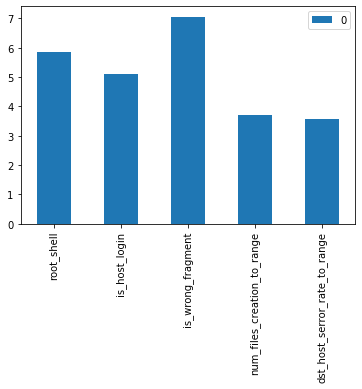

In [126]:
print(classification_report(y2c_train,model2c.predict(X2c_train)))
print()
print(classification_report(y2c_val,model2c.predict(X2c_val)))
print()
display(model2c.coef_)
print()
pd.DataFrame(model2c.coef_, columns=X2c.columns).transpose().plot.bar() 

Out of all the models, this gave us the best f1 score and precision score.

## Model 3

In [133]:
X3 = X2c
#y1 still the same

In [151]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3,y1,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [140]:
pipe_logistic = Pipeline([('scaler',StandardScaler()),
                         ('clf',LogisticRegression(class_weight='balanced'))])

In [144]:
#Setting parameters for gridsearchCV

params_1 = {
    'clf__penalty':['none'],
    'clf__solver': ['lbfgs','newton-cg','sag','saga'],
    'clf__tol':np.arange(0.1,1,0.1),
    'clf__class_weight': ['balanced'],
    'clf__random_state':[42]
}

params_2 = {
    'clf__penalty': ['l1'],
    'clf__solver': ['liblinear','saga'],
    'clf__C': np.logspace(-5,1,5),
    'clf__class_weight': ['balanced'],
    'clf__random_state':[42]
}   

params_3 = {
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear','lbfgs','newton-cg','sag','saga'],
    'clf__C': np.logspace(-5,1,5),
    'clf__class_weight': ['balanced'],
    'clf__random_state':[42]
}

params_4 = {
    'clf__penalty': ['elasticnet'],
    'clf__solver': ['saga'],
    'clf__C': np.logspace(-5,1,5),
    'clf__l1_ratio': np.arange(0.1,1,0.1),
    'clf__class_weight': ['balanced'],
    'clf__random_state':[42]
}

In [145]:
super_params = [
    params_1,
    params_2,
    params_3,
    params_4
]

In [148]:
#defining grid search
super_grid_search = GridSearchCV(pipe_logistic,
                                super_params,
                                scoring = 'recall',
                                cv=5,
                                n_jobs=-1,
                                verbose=1
                                )

In [152]:
super_grid_search.fit(X3_train, y3_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
       

In [165]:
super_grid_search.best_params_

{'clf__class_weight': 'balanced',
 'clf__penalty': 'none',
 'clf__random_state': 42,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.1}

The best parameters seems to be 
{'clf__class_weight': 'balanced',
 'clf__penalty': 'none',
 'clf__random_state': 42,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.1}

In [167]:
pd.DataFrame(super_grid_search.cv_results_).transpose()

0    \
mean_fit_time                                                      0.26033   
std_fit_time                                                     0.0925986   
mean_score_time                                                 0.00865822   
std_score_time                                                 0.000687361   
param_clf__class_weight                                           balanced   
param_clf__penalty                                                    none   
param_clf__random_state                                                 42   
param_clf__solver                                                    lbfgs   
param_clf__tol                                                         0.1   
param_clf__C                                                           NaN   
param_clf__l1_ratio                                                    NaN   
params                   {'clf__class_weight': 'balanced', 'clf__penalt...   
split0_test_score                                                 0.862069   
split1_test_score                                                 0.965517   
split2_test_score                                                 0.833333   
split3_test_score                                                      0.9   
split4_test_score                                                 0.766667   
mean_test_score                                                   0.865517   
std_test_score                                                   0.0663448   
rank_test_score                                                          1   

                                                                       1    \
mean_fit_time                                                     0.220801   
std_fit_time                                                     0.0497892   
mean_score_time                                                 0.00888495   
std_score_time                                                   0.0009154   
param_clf__class_weight                                           balanced   
param_clf__penalty                                                    none   
param_clf__random_state                                                 42   
param_clf__solver                                                    lbfgs   
param_clf__tol                                                         0.2   
param_clf__C                                                           NaN   
param_clf__l1_ratio                                                    NaN   
params                   {'clf__class_weight': 'balanced', 'clf__penalt...   
split0_test_score                                                 0.862069   
split1_test_score                                                 0.965517   
split2_test_score                                                 0.833333   
split3_test_score                                                      0.9   
split4_test_score                                                 0.766667   
mean_test_score                                                   0.865517   
std_test_score                                                   0.0663448   
rank_test_score                                                          1   

                                                                       2    \
mean_fit_time                                                     0.227762   
std_fit_time                                                     0.0457846   
mean_score_time                                                 0.00947318   
std_score_time                                                 0.000969916   
param_clf__class_weight                                           balanced   
param_clf__penalty                                                    none   
param_clf__random_state                                                 42   
param_clf__solver                                                    lbfgs   
param_clf__tol                                                         0.3   
param_clf__C 

In [169]:
print(recall_score(y3_train,super_grid_search.predict(X3_train)))
print(recall_score(y3_val,super_grid_search.predict(X3_val)))

0.8648648648648649
0.7692307692307693


In [171]:
print(classification_report(y3_train,super_grid_search.predict(X3_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       0.41      0.86      0.56       148

    accuracy                           0.99     38490
   macro avg       0.71      0.93      0.78     38490
weighted avg       1.00      0.99      1.00     38490



## KNN

In [173]:
#Data
knn_data = X1.copy()

In [180]:
#Test Train Split
X_knn_train, X_knn_val, y_knn_train, y_knn_val = train_test_split(knn_data, y1, test_size = 0.2, random_state = 42)

In [183]:
#set Transformer
knn_transformer = ColumnTransformer(transformers =
                                    [('scaler', MinMaxScaler(), X1.columns)],
                           b         remainder = 'passthrough',
                                    verbose = True)

In [191]:
knn_pipe = Pipeline(steps=[('transform', knn_transformer),
                           ('knn', KNeighborsClassifier())],
                   verbose = True)

In [185]:
knn_params_1 = {'knn__weights':['uniform','distance']}
knn_params_2 = {
    'knn__n_neighbors': np.arange(1,20,2),
    'knn__weights':['uniform','distance'],
    'knn__p':[1,2]
}

In [186]:
knn_super_param = [knn_params_1,knn_params_2]

In [195]:
#defining grid search
super_knn_search = GridSearchCV(knn_pipe,
                                knn_params_2,
                                scoring = 'recall',
                                cv=3,
                                n_jobs=-1,
                                verbose=1
                                )

In [276]:
super_knn_search.fit(knn_data, y1)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 29.2min finished


[ColumnTransformer] ........ (1 of 1) Processing scaler, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   4.6s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transform',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(copy=True,
                                                                                      feature_range=(0,
                                                                                                     1)),
                                                                         Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
     

In [277]:
super_knn_search.best_params_

{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}

In [278]:
pd.DataFrame(super_knn_search.cv_results_).sort_values(by='mean_test_score',ascending=False).transpose()

3   \
mean_fit_time                                                     15.1023   
std_fit_time                                                      0.78583   
mean_score_time                                                   88.1518   
std_score_time                                                    2.35977   
param_knn__n_neighbors                                                  1   
param_knn__p                                                            2   
param_knn__weights                                               distance   
params                  {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__wei...   
split0_test_score                                                0.701493   
split1_test_score                                                0.761194   
split2_test_score                                                0.742424   
mean_test_score                                                  0.735037   
std_test_score                                                  0.0249265   
rank_test_score                                                         1   

                                                                       2   \
mean_fit_time                                                      20.142   
std_fit_time                                                      2.24574   
mean_score_time                                                   95.9542   
std_score_time                                                    5.50767   
param_knn__n_neighbors                                                  1   
param_knn__p                                                            2   
param_knn__weights                                                uniform   
params                  {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__wei...   
split0_test_score                                                0.701493   
split1_test_score                                                0.761194   
split2_test_score                                                0.742424   
mean_test_score                                                  0.735037   
std_test_score                                                  0.0249265   
rank_test_score                                                         1   

                                                                       0   \
mean_fit_time                                                     21.8847   
std_fit_time                                                     0.312098   
mean_score_time                                                   97.4475   
std_score_time                                                    1.57277   
param_knn__n_neighbors                                                  1   
param_knn__p                                                            1   
param_knn__weights                                                uniform   
params                  {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__wei...   
split0_test_score                                                0.686567   
split1_test_score                                                0.746269   
split2_test_score                                                0.757576   
mean_test_score                                                  0.730137   
std_test_score                                                  0.0311526   
rank_test_score                                                         3   

                                                                       1   \
mean_fit_time                                                     21.3406   
std_fit_time                                                      0.47171   
mean_score_time                                                   95.2066   
std_score_time                                                    1.31357   
param_knn__n_neighbors                                                  1   
param_knn__p                                                            1   
param_knn__weights                                              

In [280]:
print(recall_score(y_knn_train,super_knn_search.predict(X_knn_train)))
print(recall_score(y_knn_val,super_knn_search.predict(X_knn_val)))

1.0
1.0


In [282]:
print(classification_report(y_knn_train,super_knn_search.predict(X_knn_train)))
print()
print(classification_report(y_knn_val,super_knn_search.predict(X_knn_val)))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       1.00      1.00      1.00       148

    accuracy                           1.00     38490
   macro avg       1.00      1.00      1.00     38490
weighted avg       1.00      1.00      1.00     38490


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9571
           1       1.00      1.00      1.00        52

    accuracy                           1.00      9623
   macro avg       1.00      1.00      1.00      9623
weighted avg       1.00      1.00      1.00      9623




## Decision Tree

In [275]:
def tree_model_image(model, column_names):
  '''
  independent variables and outputs the tree image of the model.
  '''
  assert isinstance(model, DecisionTreeClassifier), "Please input DecisionTreeClassifier"
  dot_data = StringIO()
  export_graphviz(model,
                  feature_names = column_names,
                  out_file = dot_data,
                  filled = True,
                  rounded = True,
                  special_characters = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  display(Image(graph.create_png()))

In [200]:
X_dt = X1
#y1 is the same

In [201]:
#train test split
X_dt_train, X_dt_val, y_dt_train, y_dt_val = train_test_split(X_dt, y1, test_size = 0.2, random_state= 42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       1.00      0.98      0.99       148

    accuracy                           1.00     38490
   macro avg       1.00      0.99      0.99     38490
weighted avg       1.00      1.00      1.00     38490


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9571
           1       0.88      0.81      0.84        52

    accuracy                           1.00      9623
   macro avg       0.94      0.90      0.92      9623
weighted avg       1.00      1.00      1.00      9623


Max depth for auto is 20
Number of leaves for auto is 111



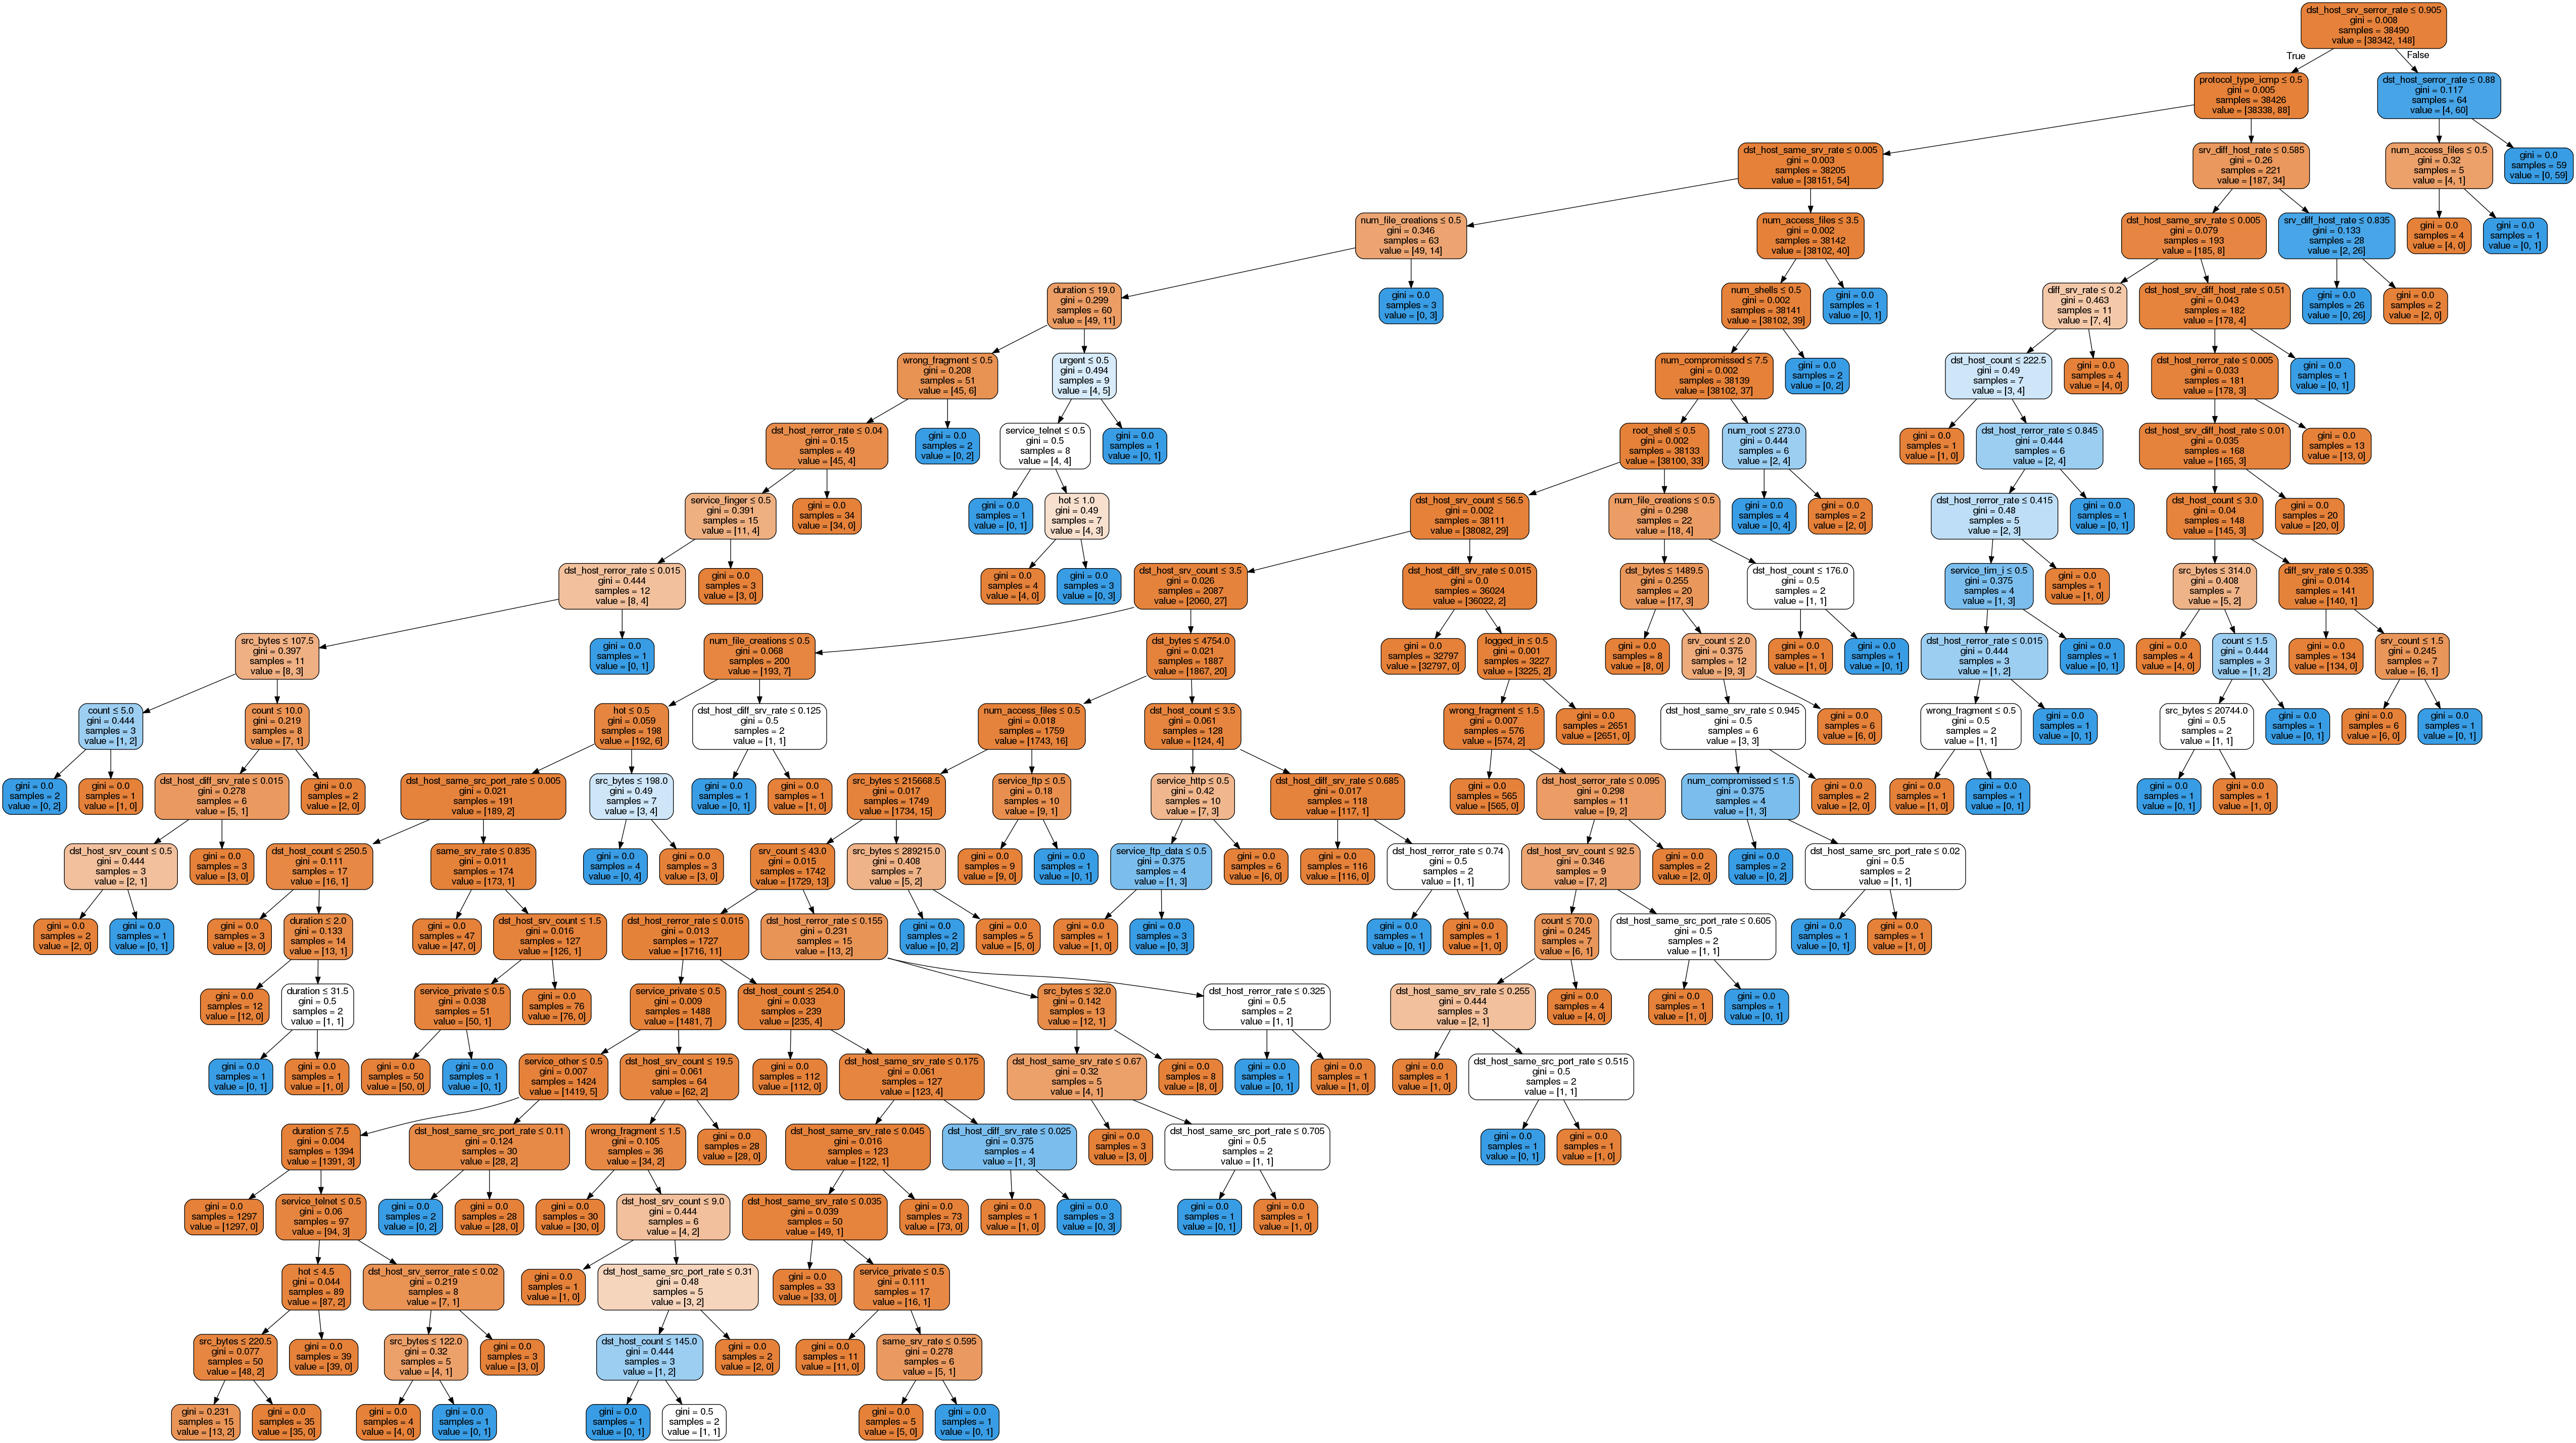

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       1.00      0.97      0.98       148

    accuracy                           1.00     38490
   macro avg       1.00      0.98      0.99     38490
weighted avg       1.00      1.00      1.00     38490


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9571
           1       0.91      0.83      0.87        52

    accuracy                           1.00      9623
   macro avg       0.96      0.91      0.93      9623
weighted avg       1.00      1.00      1.00      9623


Max depth for log2 is 20
Number of leaves for log2 is 128



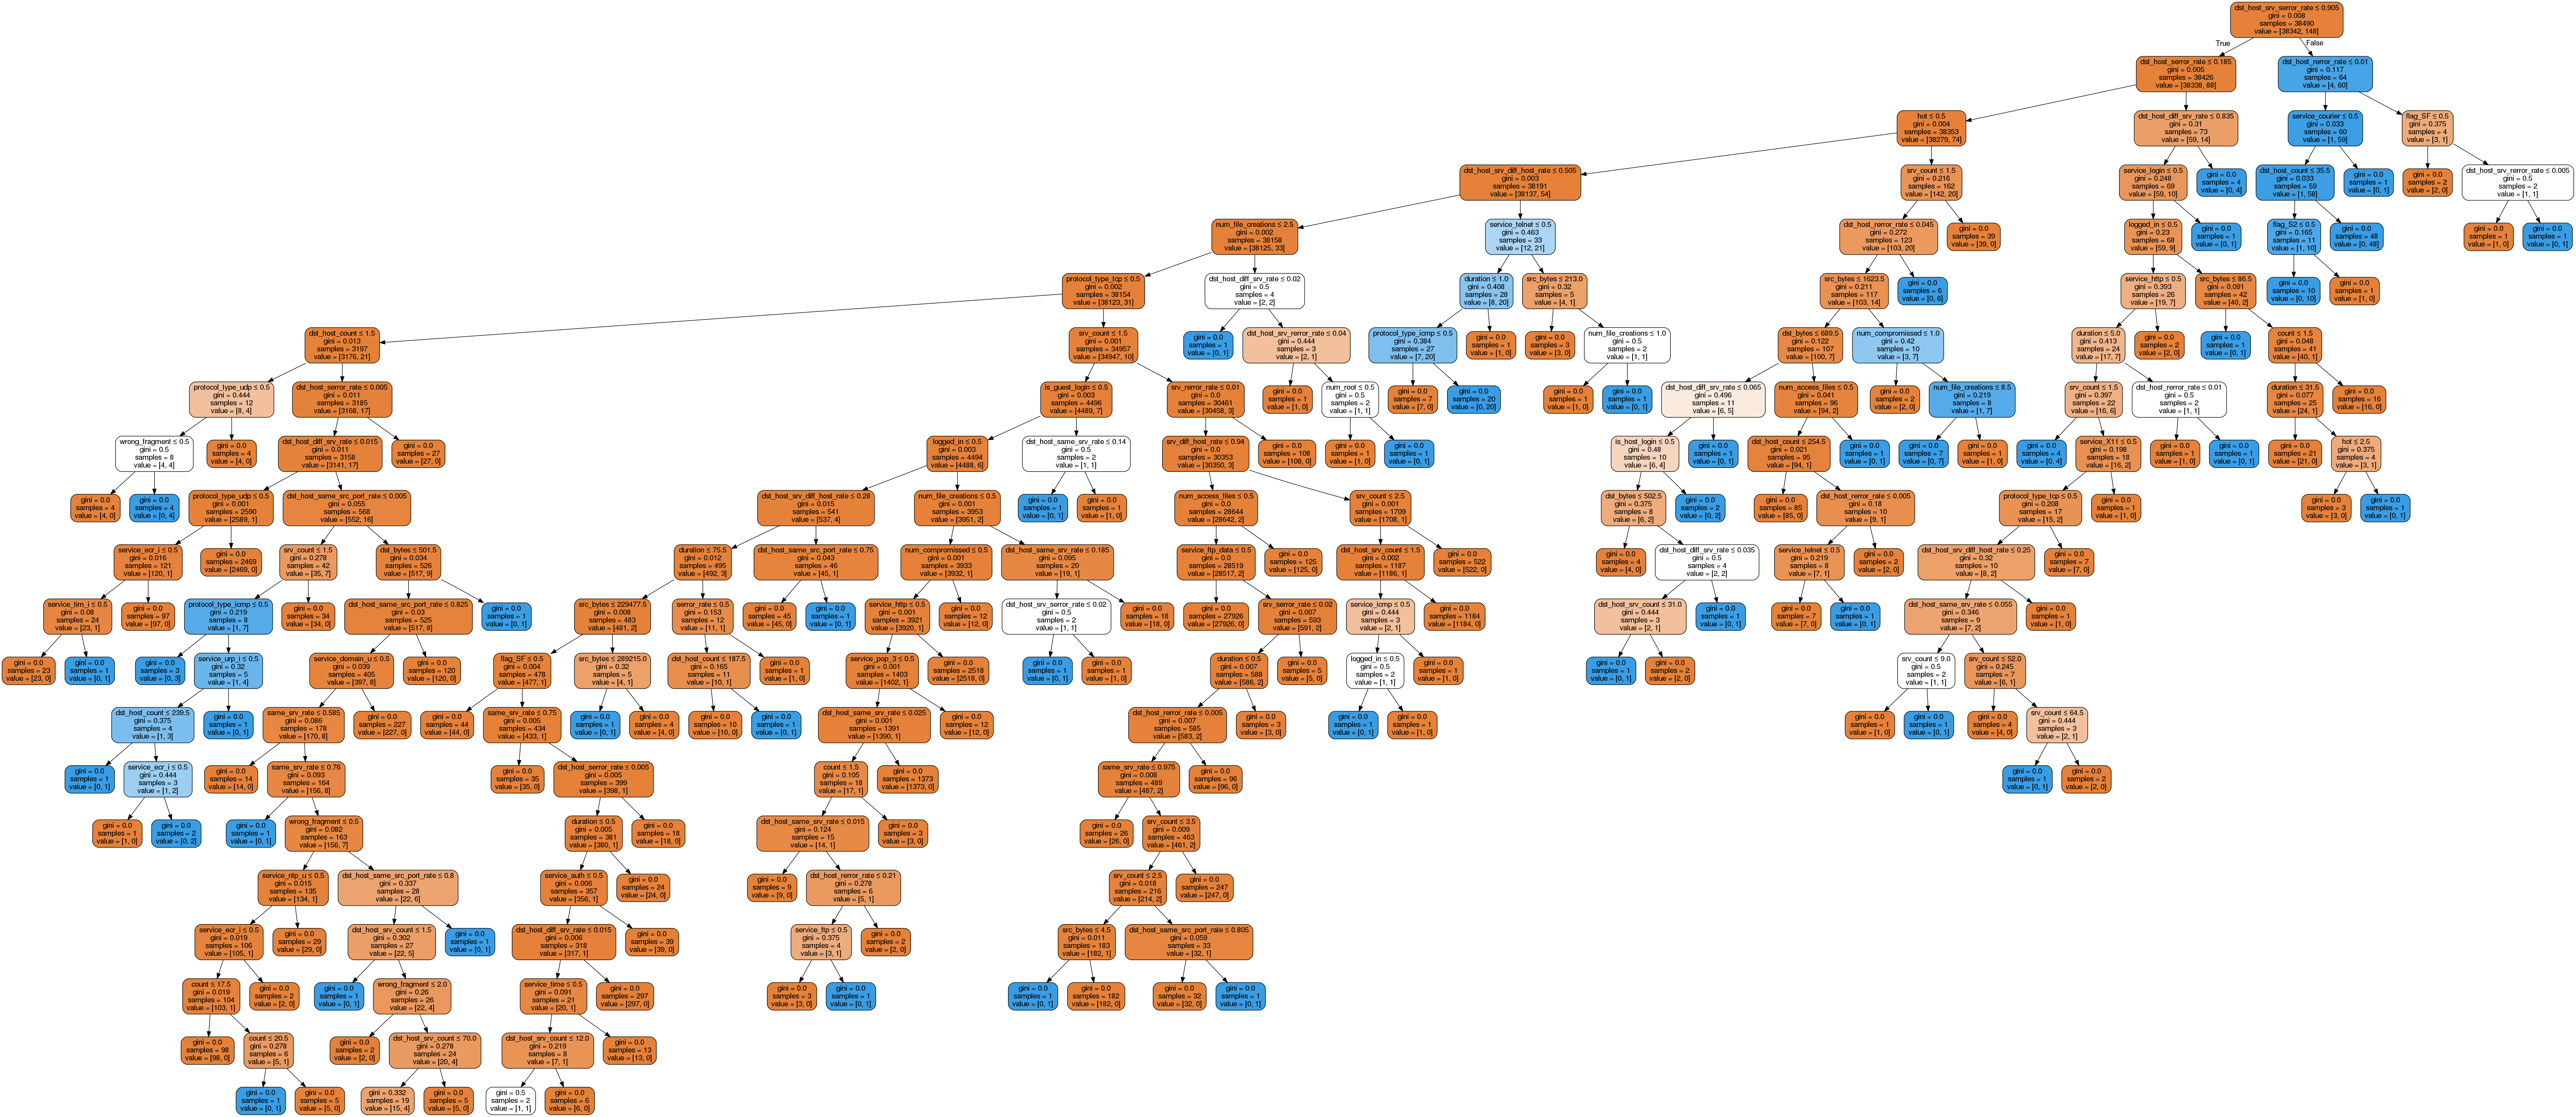

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38342
           1       1.00      1.00      1.00       148

    accuracy                           1.00     38490
   macro avg       1.00      1.00      1.00     38490
weighted avg       1.00      1.00      1.00     38490


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9571
           1       0.86      0.81      0.83        52

    accuracy                           1.00      9623
   macro avg       0.93      0.90      0.92      9623
weighted avg       1.00      1.00      1.00      9623


Max depth for None is 18
Number of leaves for None is 58



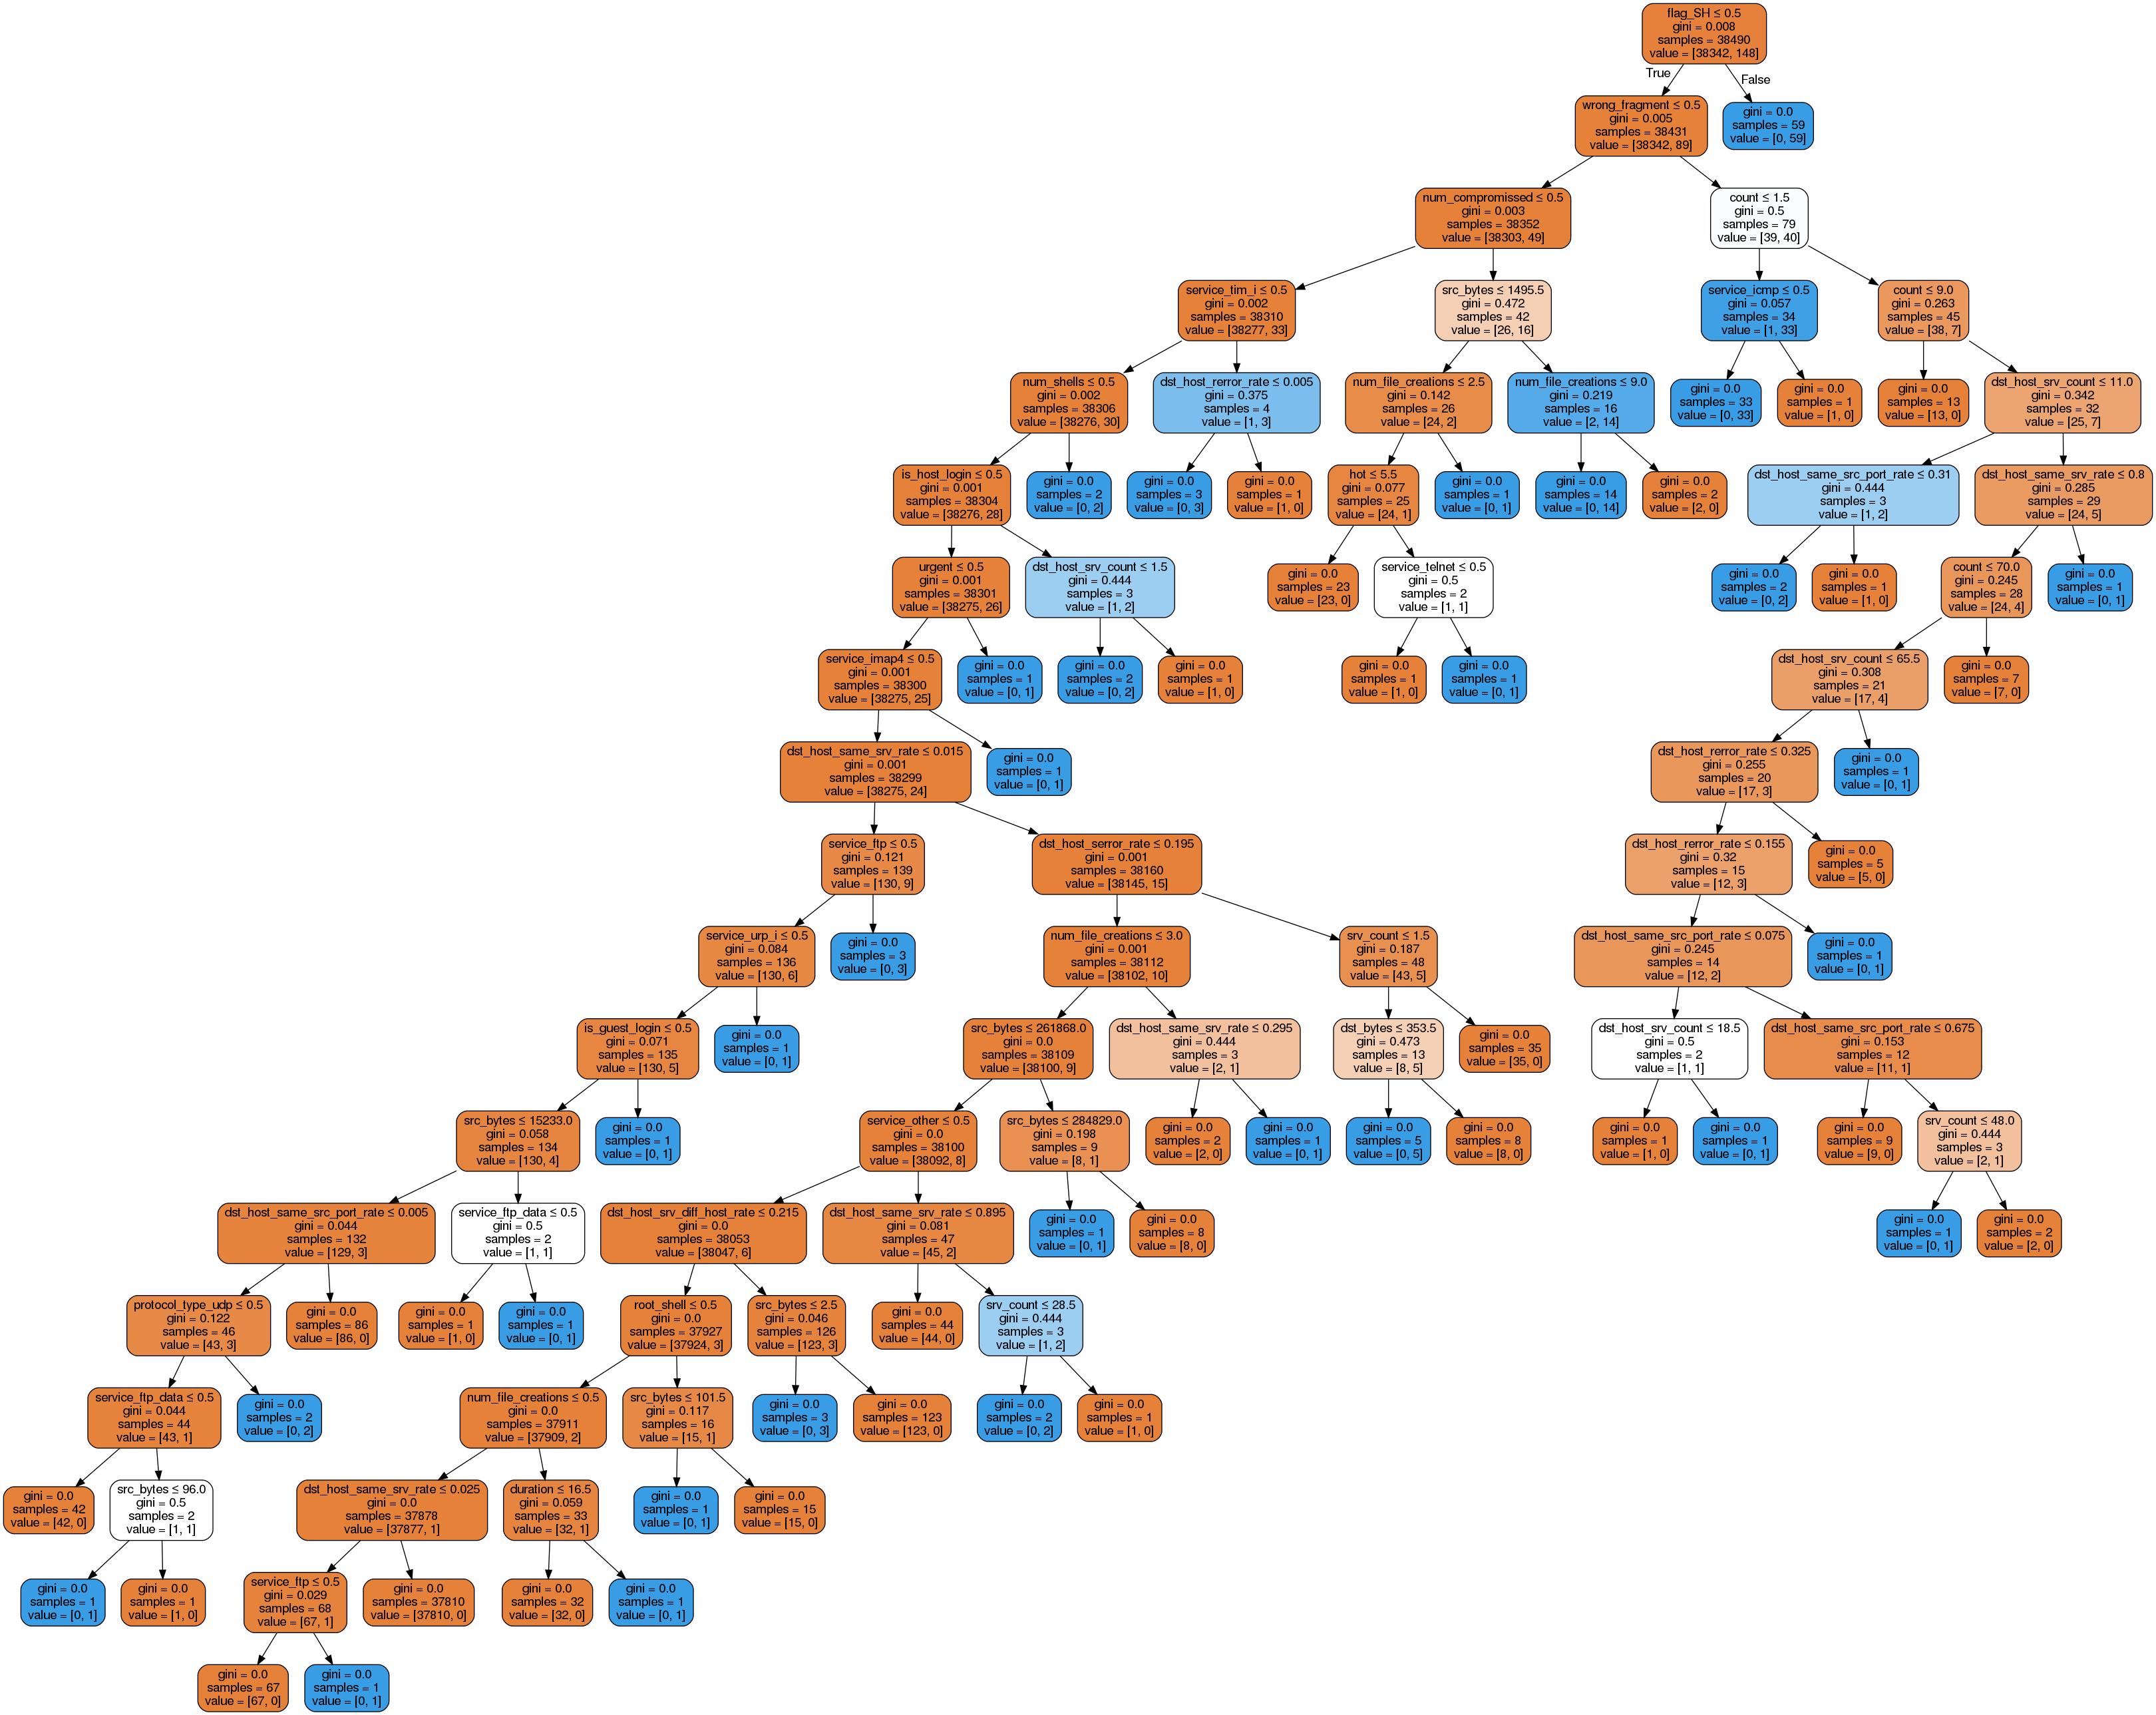

In [274]:
for option in ['auto','log2',None]:
    
    dt1=DecisionTreeClassifier(max_features=option,
                               max_depth = 20,
                               random_state=42)
    dt1.fit(X_dt_train, y_dt_train)
    
    
    print(classification_report(y_dt_train,dt1.predict(X_dt_train)))
    print()
    print(classification_report(y_dt_val,dt1.predict(X_dt_val)))
    print()
    print("Max depth for",option,"is",dt1.get_depth())
    print("Number of leaves for",option,"is",dt1.get_n_leaves())
    print()
    tree_model_image(dt1, X_dt.columns)

The best model is with option log2 with a f1 score of 87. 